In [ ]:
library(datateachr) # <- might contain the data you picked!
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


---
title: "Mini Data Analysis Milestone 2"
output: html_document
---

*To complete this milestone, you can edit [this `.rmd` file](https://raw.githubusercontent.com/UBC-STAT/stat545.stat.ubc.ca/master/content/mini-project/mini-project-2.Rmd) directly. Fill in the sections that are commented out with `<!--- start your work here--->`. When you are done, make sure to knit to an `.md` file by changing the output in the YAML header to `github_document`, before submitting a tagged release on canvas.*

# Welcome to your second (and last) milestone in your mini data analysis project!

In Milestone 1, you explored your data, came up with research questions, and obtained some results by making summary tables and graphs. This time, we will first explore more in depth the concept of *tidy data.* Then, you'll be sharpening some of the results you obtained from your previous milestone by:

-   Manipulating special data types in R: factors and/or dates and times.
-   Fitting a model object to your data, and extract a result.
-   Reading and writing data as separate files.

**NOTE**: The main purpose of the mini data analysis is to integrate what you learn in class in an analysis. Although each milestone provides a framework for you to conduct your analysis, it's possible that you might find the instructions too rigid for your data set. If this is the case, you may deviate from the instructions -- just make sure you're demonstrating a wide range of tools and techniques taught in this class.


# Instructions

**To complete this milestone**, edit [this very `.Rmd` file](https://raw.githubusercontent.com/UBC-STAT/stat545.stat.ubc.ca/master/content/mini-project/mini-project-2.Rmd) directly. Fill in the sections that are tagged with `<!--- start your work here--->`.

**To submit this milestone**, make sure to knit this `.Rmd` file to an `.md` file by changing the YAML output settings from `output: html_document` to `output: github_document`. Commit and push all of your work to your mini-analysis GitHub repository, and tag a release on GitHub. Then, submit a link to your tagged release on canvas.

**Points**: This milestone is worth 55 points (compared to the 45 points of the Milestone 1): 45 for your analysis, and 10 for your entire mini-analysis GitHub repository. Details follow.

**Research Questions**: In Milestone 1, you chose two research questions to focus on. Wherever realistic, your work in this milestone should relate to these research questions whenever we ask for justification behind your work. In the case that some tasks in this milestone don't align well with one of your research questions, feel free to discuss your results in the context of a different research question.

# Learning Objectives

By the end of this milestone, you should:

-   Understand what *tidy* data is, and how to create it using `tidyr`.
-   Generate a reproducible and clear report using R Markdown.
-   Manipulating special data types in R: factors and/or dates and times.
-   Fitting a model object to your data, and extract a result.
-   Reading and writing data as separate files.

# Setup

Begin by loading your data and the tidyverse package below:

# Task 1: Tidy your data (15 points)

In this task, we will do several exercises to reshape our data. The goal here is to understand how to do this reshaping with the `tidyr` package.

A reminder of the definition of *tidy* data:

-   Each row is an **observation**
-   Each column is a **variable**
-   Each cell is a **value**

*Tidy'ing* data is sometimes necessary because it can simplify computation. Other times it can be nice to organize data so that it can be easier to understand when read manually.

### 2.1 (2.5 points)

Based on the definition above, can you identify if your data is tidy or untidy? Go through all your columns, or if you have \>8 variables, just pick 8, and explain whether the data is untidy or tidy.

<!--------------------------- Start your work below --------------------------->

<!----------------------------------------------------------------------------->

<!--------------------------- Start your work below --------------------------->

<!----------------------------------------------------------------------------->

In [2]:
games_with_first_genre <- steam_games %>%
                            mutate(first_genre = gsub(",.*$", "", genre)) %>%
                            select(name, first_genre, release_date, original_price, discount_price)
games_subset <- filter(games_with_first_genre, first_genre %in% c("Action", "Adventure", "Racing", "RPG"))
head(games_subset)

name,first_genre,release_date,original_price,discount_price
<chr>,<chr>,<chr>,<dbl>,<dbl>
DOOM,Action,"May 12, 2016",19.99,14.99
PLAYERUNKNOWN'S BATTLEGROUNDS,Action,"Dec 21, 2017",29.99,NA
BATTLETECH,Action,"Apr 24, 2018",39.99,NA
DayZ,Action,"Dec 13, 2018",44.99,NA
EVE Online,Action,"May 6, 2003",0.00,NA
Grand Theft Auto V: Premium Online Edition,Action,NaN,NA,35.18


### Explanation
My data is tidy because each row is an observation, representing a game with its corresponding information. Each column is a variable, `name` is a variable representing the name of the game, `first_genre` is a variable representing the genre of the game, `release_date` is a variable representing the date the game is released, `original_price` is a variable representing the price when the game is published, `discount_price` is a variable representing the price when the game has a discount. Each cell is a value.

### 2.2 (5 points)

Now, if your data is tidy, untidy it! Then, tidy it back to it's original state.

If your data is untidy, then tidy it! Then, untidy it back to it's original state.

Be sure to explain your reasoning for this task. Show us the "before" and "after".


### Explanation
Currently the data is tidy, by combining columns `original_price` and `discount_price` into `change_in_price`, we make the data untidy because `change_in_price` is representing two different prices that has different meaning when analyzing the data, violating the tidy rules (each column is a variable, but not this column has 2 variables).

In [3]:
untidy <- games_subset %>%
    unite("change_in_price", original_price:discount_price, sep = " to ", remove = TRUE);
head(untidy)

name,first_genre,release_date,change_in_price
<chr>,<chr>,<chr>,<chr>
DOOM,Action,"May 12, 2016",19.99 to 14.99
PLAYERUNKNOWN'S BATTLEGROUNDS,Action,"Dec 21, 2017",29.99 to NA
BATTLETECH,Action,"Apr 24, 2018",39.99 to NA
DayZ,Action,"Dec 13, 2018",44.99 to NA
EVE Online,Action,"May 6, 2003",0 to NA
Grand Theft Auto V: Premium Online Edition,Action,NaN,NA to 35.18


### Tidy it back
To tidy it back, we could use the `separate()` function to split the column back to 2.

In [4]:
tidy <- untidy %>%
    separate(change_in_price, 
             into = c("original_price", "discount_price"), 
             sep = ' to ', 
             convert = TRUE, 
             remove = TRUE)
head(tidy)

name,first_genre,release_date,original_price,discount_price
<chr>,<chr>,<chr>,<dbl>,<dbl>
DOOM,Action,"May 12, 2016",19.99,14.99
PLAYERUNKNOWN'S BATTLEGROUNDS,Action,"Dec 21, 2017",29.99,NA
BATTLETECH,Action,"Apr 24, 2018",39.99,NA
DayZ,Action,"Dec 13, 2018",44.99,NA
EVE Online,Action,"May 6, 2003",0.00,NA
Grand Theft Auto V: Premium Online Edition,Action,NaN,NA,35.18


### 2.3 (7.5 points)

Now, you should be more familiar with your data, and also have made progress in answering your research questions. Based on your interest, and your analyses, pick 2 of the 4 research questions to continue your analysis in the next four tasks:

<!-------------------------- Start your work below ---------------------------->

1.  *Analyze how prices of games evolve over time, that is, how prices of games change depending on the year they are released.*
2.  *Is there any relationship between the reviews and the price of the game?*

<!----------------------------------------------------------------------------->

Explain your decision for choosing the above two research questions.

### Explanation
The first question is interesting in nature because the number of games published in each year reflects the overall market productivity. The second question will have some deeper implications on how users will write their review based on the price of the game. Is a game with high price will have a higher expectation than cheaper games?

<!--------------------------- Start your work below --------------------------->

<!----------------------------------------------------------------------------->


Now, try to choose a version of your data that you think will be appropriate to answer these 2 questions. Use between 4 and 8 functions that we've covered so far (i.e. by filtering, cleaning, tidy'ing, dropping irrelevant columns, etc.).

In [5]:
glimpse(steam_games)

Rows: 40,833
Columns: 21
$ id                       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ url                      <chr> "https://store.steampowered.com/app/379720/DO…
$ types                    <chr> "app", "app", "app", "app", "app", "bundle", …
$ name                     <chr> "DOOM", "PLAYERUNKNOWN'S BATTLEGROUNDS", "BAT…
$ desc_snippet             <chr> "Now includes all three premium DLC packs (Un…
$ recent_reviews           <chr> "Very Positive,(554),- 89% of the 554 user re…
$ all_reviews              <chr> "Very Positive,(42,550),- 92% of the 42,550 u…
$ release_date             <chr> "May 12, 2016", "Dec 21, 2017", "Apr 24, 2018…
$ developer                <chr> "id Software", "PUBG Corporation", "Harebrain…
$ publisher                <chr> "Bethesda Softworks,Bethesda Softworks", "PUB…
$ popular_tags             <chr> "FPS,Gore,Action,Demons,Shooter,First-Person,…
$ game_details             <chr> "Single-player,Multi-player,Co-op,Steam Achie…
$ languages    

In [6]:
reshape_steam_games <- steam_games %>%
    mutate(languages_supported = str_count(languages, ',') + 1) %>%
    separate(genre, into = c("main_genre"), sep = ",", extra = "drop", remove = FALSE) %>%
    mutate(release_year = format(as.Date(release_date, '%b %d, %Y'), '%Y')) %>%
    separate(recent_reviews, into = c("ratings"), sep = ',', extra = "drop", remove = FALSE) %>%
    select(id, release_year, languages_supported, ratings, main_genre, original_price, discount_price)
head(reshape_steam_games)

id,release_year,languages_supported,ratings,main_genre,original_price,discount_price
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,2016,10,Very Positive,Action,19.99,14.99
2,2017,17,Mixed,Action,29.99,NA
3,2018,4,Mixed,Action,39.99,NA
4,2018,9,Mixed,Action,44.99,NA
5,2003,4,Mixed,Action,0.00,NA
6,NA,12,NaN,Action,NA,35.18


# Task 2: Special Data Types (10)

For this exercise, you'll be choosing two of the three tasks below -- both tasks that you choose are worth 5 points each.

But first, tasks 1 and 2 below ask you to modify a plot you made in a previous milestone. The plot you choose should involve plotting across at least three groups (whether by facetting, or using an aesthetic like colour). Place this plot below (you're allowed to modify the plot if you'd like). If you don't have such a plot, you'll need to make one. Place the code for your plot below.

In [7]:
release_year_of_game_categorized <- within(reshape_steam_games, {
    year_categorized <- NA
    year_categorized[release_year >= 1980 & release_year < 2000] <- "Old"
    year_categorized[release_year >= 2000 & release_year < 2015] <- "Recent"
    year_categorized[release_year >= 2015] <- "Current"
})
head(release_year_of_game_categorized)

id,release_year,languages_supported,ratings,main_genre,original_price,discount_price,year_categorized
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2016,10,Very Positive,Action,19.99,14.99,Current
2,2017,17,Mixed,Action,29.99,NA,Current
3,2018,4,Mixed,Action,39.99,NA,Current
4,2018,9,Mixed,Action,44.99,NA,Current
5,2003,4,Mixed,Action,0.00,NA,Recent
6,NA,12,NaN,Action,NA,35.18,NA


In [8]:
price_of_game_categorized <- within(release_year_of_game_categorized, {
    price_categorized <- NA
    price_categorized[original_price <= 10] <- "Low Price"
    price_categorized[original_price > 10 & original_price <= 30] <- "Medium Price"
    price_categorized[original_price > 30 & original_price <= 50] <- "High Price"
    price_categorized[original_price > 50] <- "Expensive"
})
head(price_of_game_categorized)

id,release_year,languages_supported,ratings,main_genre,original_price,discount_price,year_categorized,price_categorized
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,2016,10,Very Positive,Action,19.99,14.99,Current,Medium Price
2,2017,17,Mixed,Action,29.99,NA,Current,Medium Price
3,2018,4,Mixed,Action,39.99,NA,Current,High Price
4,2018,9,Mixed,Action,44.99,NA,Current,High Price
5,2003,4,Mixed,Action,0.00,NA,Recent,Low Price
6,NA,12,NaN,Action,NA,35.18,NA,NA


In [9]:
price_versus_years_table <- price_of_game_categorized %>%
    group_by(year_categorized) %>%
    count(price_categorized) %>%
    drop_na(year_categorized) %>%
    drop_na(price_categorized)
print(price_versus_years_table)

# A tibble: 12 × 3
# Groups:   year_categorized [3]
   year_categorized price_categorized     n
   <chr>            <chr>             <int>
 1 Current          Expensive           859
 2 Current          High Price          709
 3 Current          Low Price         22305
 4 Current          Medium Price       5431
 5 Old              Expensive            11
 6 Old              High Price            1
 7 Old              Low Price           251
 8 Old              Medium Price         18
 9 Recent           Expensive           160
10 Recent           High Price           90
11 Recent           Low Price          3834
12 Recent           Medium Price       1047


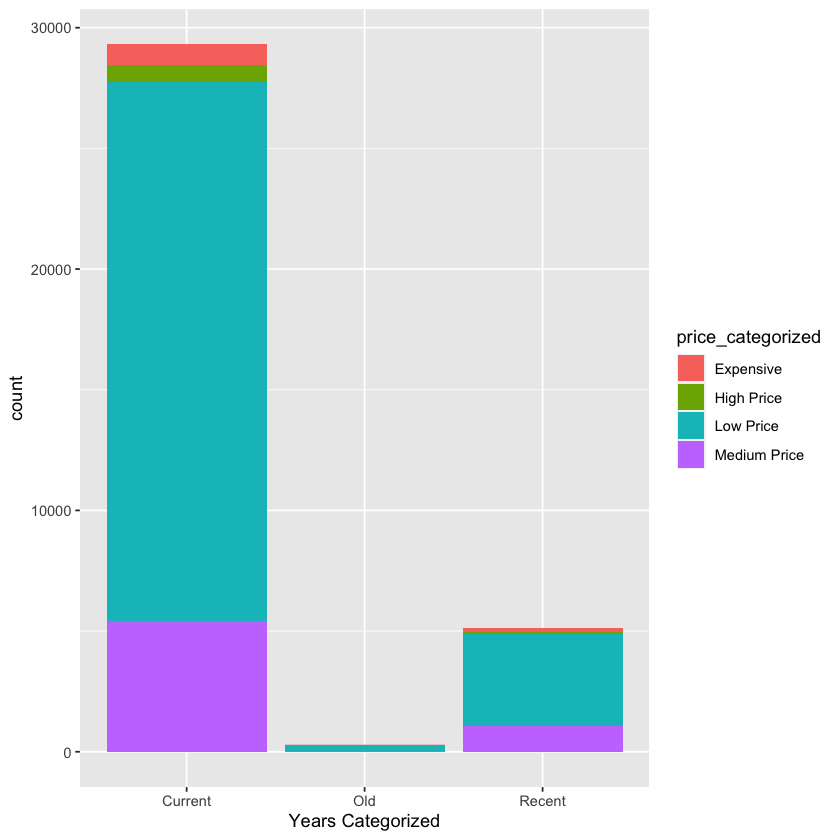

In [10]:
prices_versus_years_diagram <- price_versus_years_table %>%
    ggplot(aes(x = year_categorized, weight = n)) + 
    geom_bar(aes(fill = price_categorized)) +
    xlab("Years Categorized")

prices_versus_years_diagram

Now, choose two of the following tasks.

1.  Produce a new plot that reorders a factor in your original plot, using the `forcats` package (3 points). Then, in a sentence or two, briefly explain why you chose this ordering (1 point here for demonstrating understanding of the reordering, and 1 point for demonstrating some justification for the reordering, which could be subtle or speculative.)

2.  Produce a new plot that groups some factor levels together into an "other" category (or something similar), using the `forcats` package (3 points). Then, in a sentence or two, briefly explain why you chose this grouping (1 point here for demonstrating understanding of the grouping, and 1 point for demonstrating some justification for the grouping, which could be subtle or speculative.)

3.  If your data has some sort of time-based column like a date (but something more granular than just a year):

    1.  Make a new column that uses a function from the `lubridate` or `tsibble` package to modify your original time-based column. (3 points)

        -   Note that you might first have to *make* a time-based column using a function like `ymd()`, but this doesn't count.
        -   Examples of something you might do here: extract the day of the year from a date, or extract the weekday, or let 24 hours elapse on your dates.

    2.  Then, in a sentence or two, explain how your new column might be useful in exploring a research question. (1 point for demonstrating understanding of the function you used, and 1 point for your justification, which could be subtle or speculative).

        -   For example, you could say something like "Investigating the day of the week might be insightful because penguins don't work on weekends, and so may respond differently".

<!-------------------------- Start your work below ---------------------------->

**Task Number**: 1

<!----------------------------------------------------------------------------->

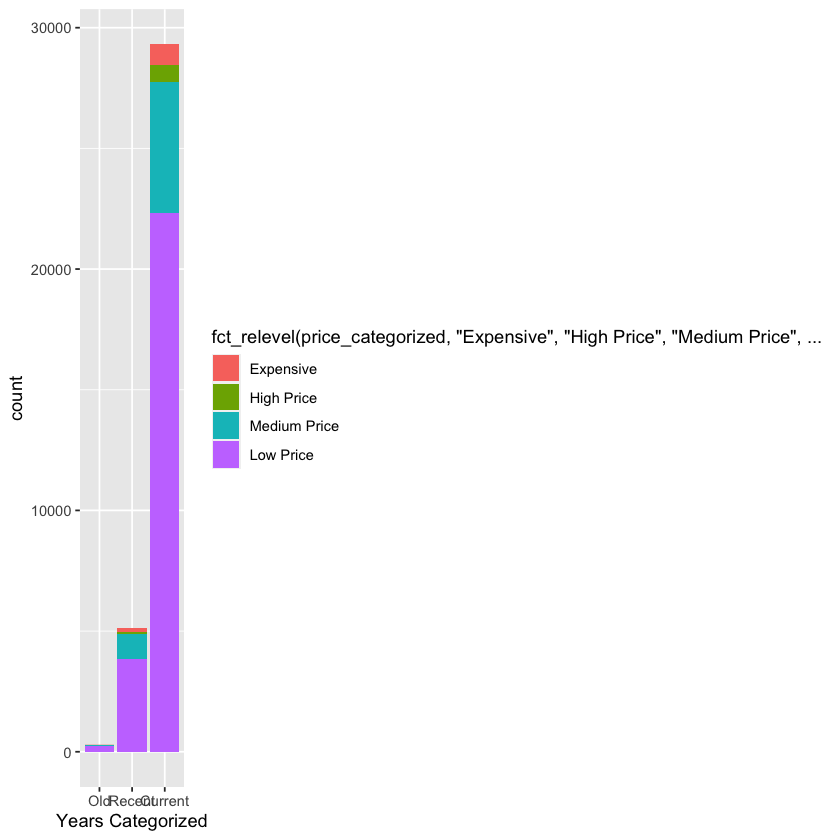

In [11]:
reordered_1 <- price_versus_years_table %>%
    ggplot(aes(x = fct_reorder(year_categorized, n, .fun = mean), weight = n)) + 
    geom_bar(aes(fill = fct_relevel(price_categorized, "Expensive", "High Price", "Medium Price", "Low Price"))) +
    xlab("Years Categorized")

reordered_1

### Explanation
With the help of `fct_reorder()` function, I could reorder x-axis in ascending years, from old to recent to current. I could reorder y-axis in ascending prices using `fct_relevel()` function, from low to medium to high to expensive.

<!-------------------------- Start your work below ---------------------------->

**Task Number**: 2

<!----------------------------------------------------------------------------->

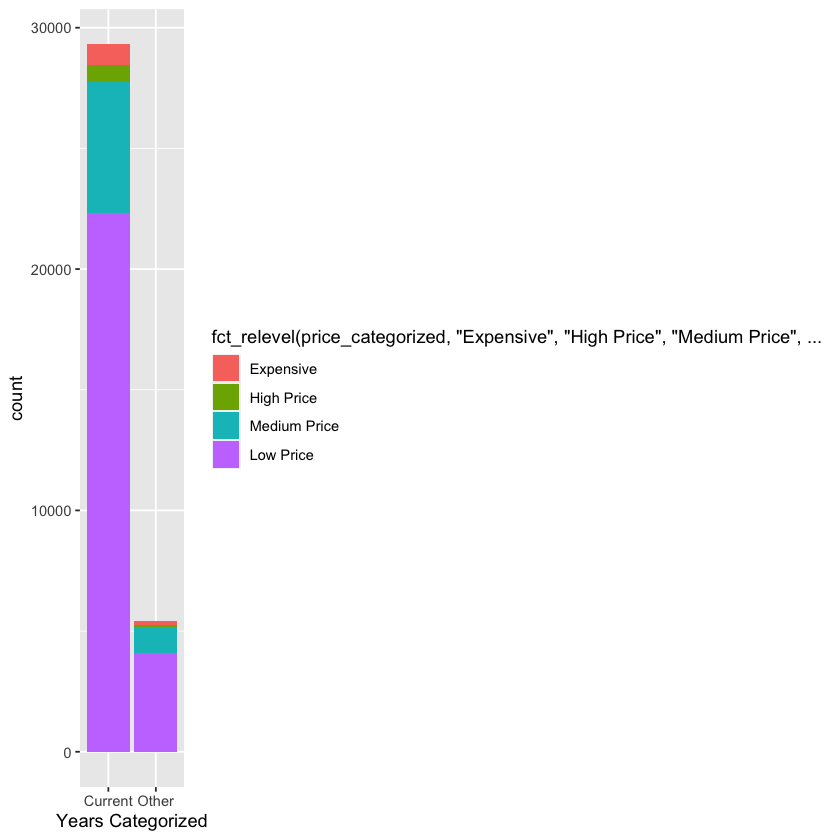

In [12]:
reordered_2 <- price_versus_years_table %>%
    ggplot(aes(x = fct_other(year_categorized, keep = c("Current")), weight = n)) + 
    geom_bar(aes(fill = fct_relevel(price_categorized, "Expensive", "High Price", "Medium Price", "Low Price"))) +
    xlab("Years Categorized")

reordered_2

### Explanation
I used `fct_other()` function to keep only current years and others because there's only a few counts for year category old.

# Task 3: Modelling

## 2.0 (no points)

Pick a research question, and pick a variable of interest (we'll call it "Y") that's relevant to the research question. Indicate these.

<!-------------------------- Start your work below ---------------------------->

**Research Question**: What's the relationship between the overall average price of the game with the release year of the game?

**Variable of interest**: `original_price` of the steam game

<!----------------------------------------------------------------------------->

## 2.1 (5 points)

Fit a model or run a hypothesis test that provides insight on this variable with respect to the research question. Store the model object as a variable, and print its output to screen. We'll omit having to justify your choice, because we don't expect you to know about model specifics in STAT 545.

-   **Note**: It's OK if you don't know how these models/tests work. Here are some examples of things you can do here, but the sky's the limit.

    -   You could fit a model that makes predictions on Y using another variable, by using the `lm()` function.
    -   You could test whether the mean of Y equals 0 using `t.test()`, or maybe the mean across two groups are different using `t.test()`, or maybe the mean across multiple groups are different using `anova()` (you may have to pivot your data for the latter two).
    -   You could use `lm()` to test for significance of regression.

In [13]:
year_and_original_price <- reshape_steam_games %>%
    drop_na(release_year) %>%
    group_by(release_year, original_price) %>%
    summarize(count = n(), .groups = "drop")

print(year_and_original_price)

# A tibble: 1,286 × 3
   release_year original_price count
   <chr>                 <dbl> <int>
 1 1981                   0        1
 2 1983                   9.99     1
 3 1984                   1.99     1
 4 1984                   9.99     1
 5 1985                  55.9      1
 6 1986                   7.99     1
 7 1987                   1.02     1
 8 1987                   5.99     1
 9 1987                   6.99     2
10 1988                   2.99     1
# … with 1,276 more rows


In [14]:
final <- year_and_original_price %>%
    group_by(release_year) %>%
    drop_na(original_price) %>%
    drop_na(count) %>%
    summarize(mean_of_price_each_year = sum(original_price * count) / sum(count))

print(final)

# A tibble: 41 × 2
   release_year mean_of_price_each_year
   <chr>                          <dbl>
 1 1981                            0   
 2 1983                            9.99
 3 1984                            5.99
 4 1985                           55.9 
 5 1986                            7.99
 6 1987                            5.25
 7 1988                            6.39
 8 1989                           12.0 
 9 1990                           19.6 
10 1991                           10.7 
# … with 31 more rows


In [15]:
final$release_year <- as.integer(final$release_year)

final <- filter(final, release_year > 1981 & release_year <= 2021)

final

release_year,mean_of_price_each_year
<int>,<dbl>
1983,9.990000
1984,5.990000
1985,55.920000
1986,7.990000
1987,5.247500
1988,6.390000
1989,11.988333
1990,19.597500
1991,10.698571


In [16]:
final_lm <- lm(mean_of_price_each_year ~ release_year, final)

final_lm


Call:
lm(formula = mean_of_price_each_year ~ release_year, data = final)

Coefficients:
 (Intercept)  release_year  
    -789.643         0.402  


In [17]:
final_test = t.test(final$release_year, final$mean_of_price_each_year)

final_test


	Welch Two Sample t-test

data:  final$release_year and final$mean_of_price_each_year
t = 596.56, df = 63.181, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1979.861 1993.168
sample estimates:
 mean of x  mean of y 
2001.50000   14.98547 


## 2.2 (5 points)

Produce something relevant from your fitted model: either predictions on Y, or a single value like a regression coefficient or a p-value.

-   Be sure to indicate in writing what you chose to produce.
-   Your code should either output a tibble (in which case you should indicate the column that contains the thing you're looking for), or the thing you're looking for itself.
-   Obtain your results using the `broom` package if possible. If your model is not compatible with the broom function you're needing, then you can obtain your results by some other means, but first indicate which broom function is not compatible.

In [18]:
library(broom)

### Tidy
`tidy()` function from the `broom` package gives me a statistical summary of each component of my model. In this case, these two rows give me the intercept and the slope.

In [19]:
final_tidy <- tidy(final_lm)

final_tidy

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-789.6432335,500.4040562,-1.578011,0.1233109
release_year,0.4020128,0.2500108,1.607982,0.1165754


# Task 4: Reading and writing data

Get set up for this exercise by making a folder called `output` in the top level of your project folder / repository. You'll be saving things there.

## 3.1 (5 points)

Take a summary table that you made from Milestone 1 (Task 4.2), and write it as a csv file in your `output` folder. Use the `here::here()` function.

-   **Robustness criteria**: You should be able to move your Mini Project repository / project folder to some other location on your computer, or move this very Rmd file to another location within your project repository / folder, and your code should still work.
-   **Reproducibility criteria**: You should be able to delete the csv file, and remake it simply by knitting this Rmd file.


In [20]:
price_versus_years_table

year_categorized,price_categorized,n
<chr>,<chr>,<int>
Current,Expensive,859
Current,High Price,709
Current,Low Price,22305
Current,Medium Price,5431
Old,Expensive,11
Old,High Price,1
Old,Low Price,251
Old,Medium Price,18
Recent,Expensive,160


In [22]:
install.packages("here")


The downloaded binary packages are in
	/var/folders/23/n1s0jd6x0dlc95sn69z4wxq00000gn/T//RtmpRQ8T5K/downloaded_packages


In [23]:
here::here()

[1] "/Users/jiayuhuang/Desktop/545m2/milestone2"

## 3.2 (5 points)

Write your model object from Task 3 to an R binary file (an RDS), and load it again. Be sure to save the binary file in your `output` folder. Use the functions `saveRDS()` and `readRDS()`.

-   The same robustness and reproducibility criteria as in 3.1 apply here.

In [25]:
saveRDS(final_tidy, here::here("output", "mini_project_2_final_tidy.rds"))
read_final_tidy <- readRDS(here::here("output", "mini_project_2_final_tidy.rds"))

read_final_tidy

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-789.6432335,500.4040562,-1.578011,0.1233109
release_year,0.4020128,0.2500108,1.607982,0.1165754


# Tidy Repository

Now that this is your last milestone, your entire project repository should be organized. Here are the criteria we're looking for.

## Main README (3 points)

There should be a file named `README.md` at the top level of your repository. Its contents should automatically appear when you visit the repository on GitHub.

Minimum contents of the README file:

-   In a sentence or two, explains what this repository is, so that future-you or someone else stumbling on your repository can be oriented to the repository.
-   In a sentence or two (or more??), briefly explains how to engage with the repository. You can assume the person reading knows the material from STAT 545A. Basically, if a visitor to your repository wants to explore your project, what should they know?

Once you get in the habit of making README files, and seeing more README files in other projects, you'll wonder how you ever got by without them! They are tremendously helpful.

## File and Folder structure (3 points)

You should have at least four folders in the top level of your repository: one for each milestone, and one output folder. If there are any other folders, these are explained in the main README.

Each milestone document is contained in its respective folder, and nowhere else.

Every level-1 folder (that is, the ones stored in the top level, like "Milestone1" and "output") has a `README` file, explaining in a sentence or two what is in the folder, in plain language (it's enough to say something like "This folder contains the source for Milestone 1").

## Output (2 points)

All output is recent and relevant:

-   All Rmd files have been `knit`ted to their output, and all data files saved from Task 4 above appear in the `output` folder.
-   All of these output files are up-to-date -- that is, they haven't fallen behind after the source (Rmd) files have been updated.
-   There should be no relic output files. For example, if you were knitting an Rmd to html, but then changed the output to be only a markdown file, then the html file is a relic and should be deleted.

Our recommendation: delete all output files, and re-knit each milestone's Rmd file, so that everything is up to date and relevant.

PS: there's a way where you can run all project code using a single command, instead of clicking "knit" three times. More on this in STAT 545B!

## Error-free code (1 point)

This Milestone 1 document knits error-free, and the Milestone 2 document knits error-free.

## Tagged release (1 point)

You've tagged a release for Milestone 1, and you've tagged a release for Milestone 2.

### Attribution

Thanks to Victor Yuan for mostly putting this together.